# Matplotlib Formatting Charts

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\swati\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

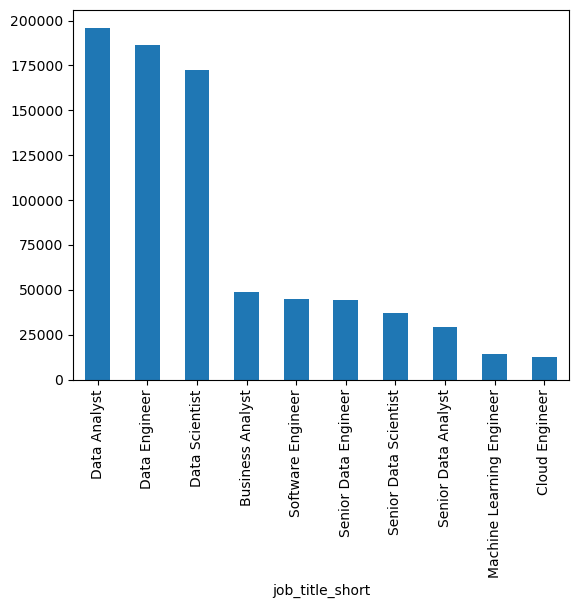

In [ ]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

In [2]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [3]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

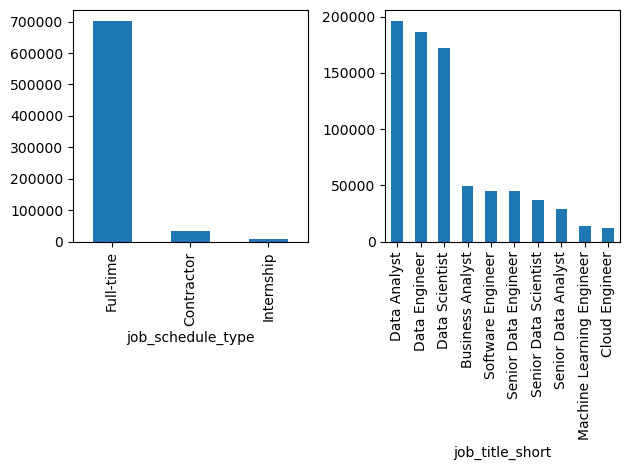

In [9]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

fig.tight_layout()

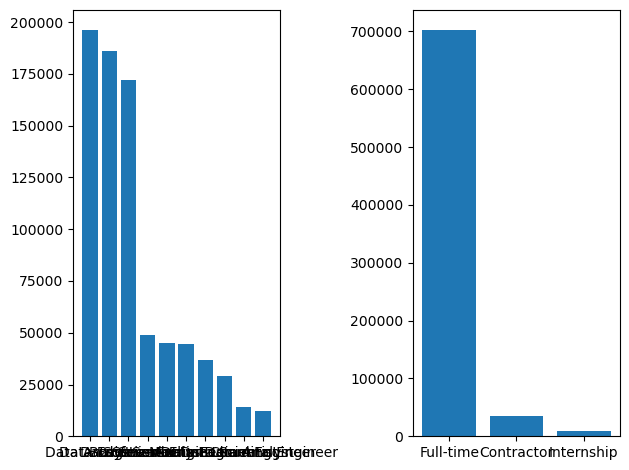

In [6]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

In [7]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
462,Data Analyst,chainer,1
432,Cloud Engineer,wrike,1
410,Cloud Engineer,theano,1
24,Business Analyst,chainer,1


In [8]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

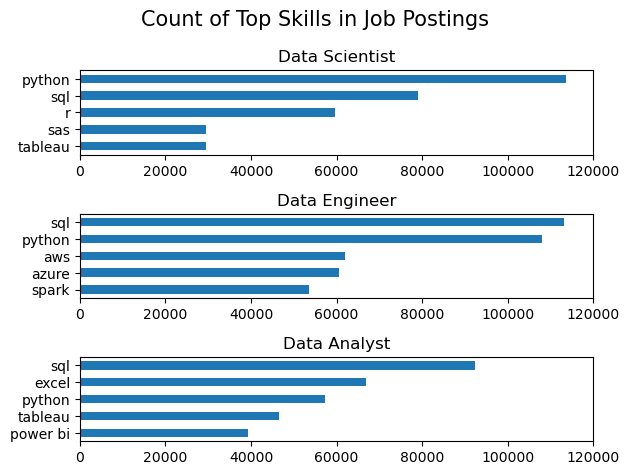

In [18]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle('Count of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()